# 1. Load and read data



## get data from kagle
to use:
1. Go to your Kaggle account settings page and click on "Create New API Token". This will download a JSON file containing your API credentials.

2. Upload the JSON file to your Colab notebook using the "Upload" button as described above.
3. run the following

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
!kaggle datasets download -d dmitrybabko/speech-emotion-recognition-en

speech-emotion-recognition-en.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!mkdir Crema
!unzip /content/speech-emotion-recognition-en.zip -d Crema

Streaming output truncated to the last 5000 lines.
  inflating: Crema/Crema/1088_IWW_FEA_XX.wav  
  inflating: Crema/Crema/1088_IWW_HAP_XX.wav  
  inflating: Crema/Crema/1088_IWW_NEU_XX.wav  
  inflating: Crema/Crema/1088_IWW_SAD_XX.wav  
  inflating: Crema/Crema/1088_MTI_ANG_XX.wav  
  inflating: Crema/Crema/1088_MTI_DIS_XX.wav  
  inflating: Crema/Crema/1088_MTI_FEA_XX.wav  
  inflating: Crema/Crema/1088_MTI_HAP_XX.wav  
  inflating: Crema/Crema/1088_MTI_NEU_XX.wav  
  inflating: Crema/Crema/1088_MTI_SAD_XX.wav  
  inflating: Crema/Crema/1088_TAI_ANG_XX.wav  
  inflating: Crema/Crema/1088_TAI_DIS_XX.wav  
  inflating: Crema/Crema/1088_TAI_FEA_XX.wav  
  inflating: Crema/Crema/1088_TAI_HAP_XX.wav  
  inflating: Crema/Crema/1088_TAI_NEU_XX.wav  
  inflating: Crema/Crema/1088_TAI_SAD_XX.wav  
  inflating: Crema/Crema/1088_TIE_ANG_XX.wav  
  inflating: Crema/Crema/1088_TIE_DIS_XX.wav  
  inflating: Crema/Crema/1088_TIE_FEA_XX.wav  
  inflating: Crema/Crema/1088_TIE_HAP_XX.wav  
  inflati

## Import libraries 

In [ ]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd

import tensorflow as tf
import keras 

from sklearn.model_selection import train_test_split
from sklearn.metrics import *


## Read data

In [ ]:
dataset_path = "/content/Crema/Crema/"

In [ ]:
def process():
    """
    Returns a dataset of audio files stored in the directory ./Crema
    """
    
    dataset = []
    labels = []
    rates = []
    for file in sorted(os.listdir(dataset_path)):
        temp = file[9:12]
        labels.append(temp)
        
        path = os.path.join(dataset_path, file)
        (aud, rate) = librosa.load(path, sr=None)
        dataset.append(aud)
        rates.append(rate)

    #dataset = pd.DataFrame(dataset)

    # construct a dataframe from the signals as features
    return dataset, labels, rates

In [ ]:
def plot_waveform(audio):
    """
    Plots the waveform of a given audio samples

    Args:
        audio (nparray): nparray representing the audio samples
    """
    
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(audio)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.show()


def play_audio(aud, rates):
  return ipd.Audio(aud,rate=rates)


In [ ]:
dataset, labels_string, rates = process()

In [ ]:
# get min and max length of entry for the padding
min_len = min(len(e) for e in dataset)
max_len = max(len(e) for e in dataset)
print(min_len)
print(max_len)

20287
80080


7442 36409
['ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'ANG', 'ANG', 'DIS', 'DIS', 'DIS', 'FEA', 'FEA', 'FEA', 'HAP', 'HAP', 'HAP', 'NEU', 'SAD', 'SAD', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'ANG', 'ANG', 'DIS', 'DIS', 'DIS', 'FEA', 'FEA', 'FEA', 'HAP', 'HAP', 'HAP', 'NEU', 'SAD', 'SAD', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', '

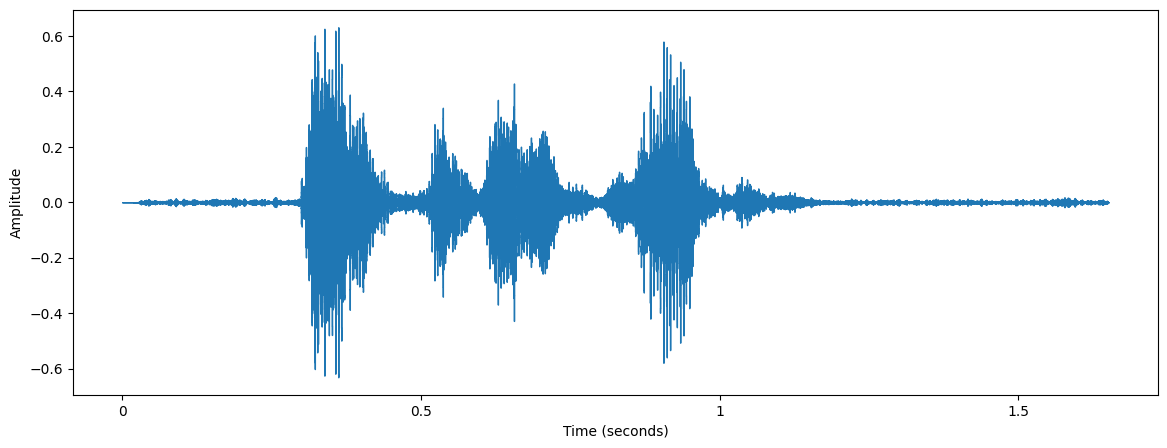

In [ ]:
print(len(dataset), len(dataset[0]))
print(labels_string)
print(len(labels_string))
print(rates)
print(len(rates))
plot_waveform(dataset[0])
play_audio(dataset[0], rates[0])


In [ ]:
# make each entry size = (min+max)/2 by padding the smaller entries and croping the bigger entry
avg = (min_len+max_len)//2
for i in range(len(dataset)):
  if len(dataset[i]) > avg:  # crop
    start = (len(dataset[i])-avg)//2
    end = avg+start
    dataset[i] = dataset[i][start: end]
  elif len(dataset[i]) < avg:  # padding:
    s1 = (avg-len(dataset[i]))//2
    temp1 = np.zeros(s1)
    temp2 = np.zeros(avg-s1-len(dataset[i]))
    dataset[i] = np.concatenate((temp1, dataset[i], temp2))



In [ ]:
min_len = min(len(e) for e in dataset)
max_len = max(len(e) for e in dataset)
print(min_len)
print(max_len)

50183
50183


7442 50183
['ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'ANG', 'ANG', 'DIS', 'DIS', 'DIS', 'FEA', 'FEA', 'FEA', 'HAP', 'HAP', 'HAP', 'NEU', 'SAD', 'SAD', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'ANG', 'ANG', 'DIS', 'DIS', 'DIS', 'FEA', 'FEA', 'FEA', 'HAP', 'HAP', 'HAP', 'NEU', 'SAD', 'SAD', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', '

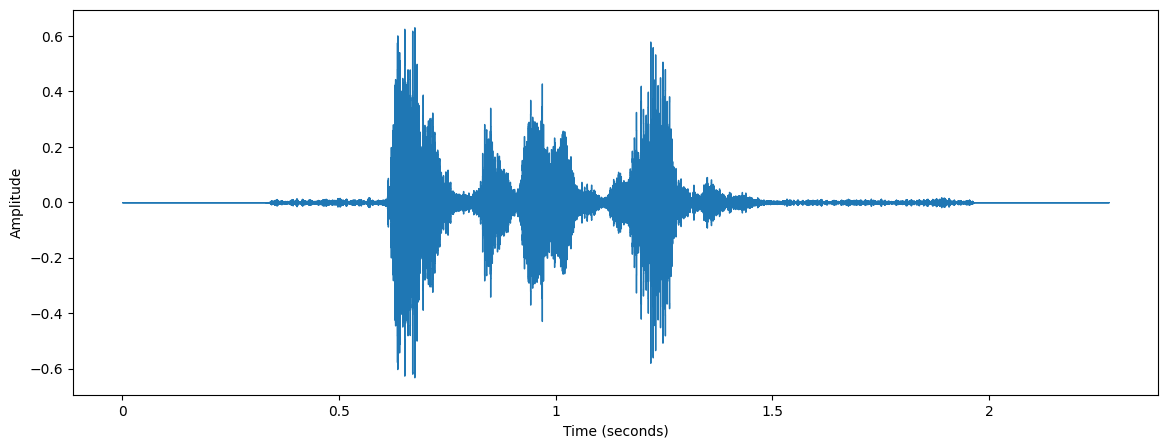

In [ ]:
print(len(dataset), len(dataset[0]))
print(labels_string)
print(len(labels_string))
print(rates)
print(len(rates))
plot_waveform(dataset[0])
play_audio(dataset[0], rates[0])

# 2. Create the Feature Space

## labels prep

In [ ]:
#map labels to numeric
labels_map = {
    "ANG": 0,
    "DIS": 1,
    "FEA": 2,
    "HAP": 3,
    "NEU": 4,
    "SAD": 5

}

def mapper(element):
  return labels_map[element]


In [ ]:
labels = list(map(mapper, labels_string)) # numeric

## Zero crossing rate & Energy

In [ ]:
def construct_zero_crossing_rate(dataset):
    """
    Converts a dataset of audios into a feature space passed on the
    zero crossing rate of each sample in each entry in the dataset.

    Args:
        dataset (array): an array representing the dataset

    Returns:
        array: python list representing the feature space
    """
    
    feature_space = []

    for entry in dataset:
        feature_space.append(librosa.feature.zero_crossing_rate(y=entry)[0])

    return feature_space

In [ ]:
def construct_energy(dataset):
    """
    Converts a dataset of audios into a feature space passed on the
    zero crossing rate of each sample in each entry in the dataset.

    Args:
        dataset (array): an array representing the dataset

    Returns:
        array: python list representing the feature space
    """
    
    feature_space = []
    frame_size = 1024
    hop_length = frame_size // 2

    for entry in dataset:
        frames = librosa.util.frame(entry, frame_length=frame_size, hop_length=hop_length)
        # Compute energy of each frame
        energies = np.sum(frames**2, axis=0) / frame_size
        feature_space.append(energies)

    return feature_space

In [ ]:
construct_energy(dataset[0:1])[0].shape

(97,)

## Other feature but we didn't use

In [ ]:
def construct_spectral_rolloff(dataset, rates):
  rolloff = []
  for i in range(len(dataset)):
    rolloff.append(librosa.feature.spectral_rolloff(y=dataset[i], sr= rates[i])[0])

  return rolloff

In [ ]:
construct_spectral_rolloff(dataset[0:1], rates[0:1])[0].shape

(99,)

In [ ]:
def construct_spectral_bandwidth(dataset, rates):
    spec_band = []
    for i in range(len(dataset)):
        spec_band.append(librosa.feature.spectral_bandwidth(y=dataset[i], sr= rates[i])[0])

    return spec_band

In [ ]:
construct_spectral_bandwidth(dataset[0:1], rates[0:1])[0].shape

(99,)

In [ ]:
def construct_spectral_centroid(dataset, rates):
    spectral_centroid = []
    for i in range(len(dataset)):
        spectral_centroid.append(librosa.feature.spectral_centroid(y=dataset[i], sr=rates[i])[0])

    return spectral_centroid

In [ ]:
construct_spectral_centroid(dataset[0:1], rates[0:1])[0].shape


(99,)

In [ ]:
def construct_MFCCs(dataset, rates):
    """
    get the Mel Frequency Cepstral Coefficients
    """
    MFCCs = []
    for i in range(len(dataset)):
        MFCCs.append(librosa.feature.mfcc(y=dataset[i], sr=rates[i], n_mfcc=1)[0])

    return MFCCs

In [ ]:
construct_MFCCs(dataset[0:1], rates[0:1])[0].shape


(99,)

## mel spectrogram

In [ ]:
def construct_melspectrogram(dataset, rate):
  spectrogram = []
  for i in range(len(dataset)):
    spectrogram.append(librosa.feature.melspectrogram(y=dataset[i], sr=rate[i]))

  return spectrogram

## build the feature space

In [ ]:
#zero crossing rate
zcr_feature = construct_zero_crossing_rate(dataset)
pd.DataFrame(zcr_feature).to_csv("zcr.csv", index=False)
print("zero crossing rate", zcr_feature[0])

#energy
energy_feature = construct_energy(dataset)
pd.DataFrame(energy_feature).to_csv('nrg.csv', index=False)
print("energy", energy_feature[0])

#mel spectrogram
melspectrogram = construct_melspectrogram(dataset, rates)
#melspectrogram.to_csv('mel_sp.csv', index=False)
print("melspectrogram", melspectrogram[0])

zero crossing rate [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.04541016 0.05371094 0.06298828 0.07226562 0.03613281
 0.03564453 0.03369141 0.03271484 0.03564453 0.03662109 0.04150391
 0.03857422 0.08007812 0.11425781 0.12841797 0.14501953 0.10644531
 0.07421875 0.06054688 0.08544922 0.11523438 0.16210938 0.17822266
 0.15576172 0.12597656 0.10253906 0.11035156 0.11816406 0.13085938
 0.12451172 0.11669922 0.10986328 0.09277344 0.09277344 0.17871094
 0.24951172 0.27685547 0.28466797 0.20996094 0.15332031 0.15869141
 0.16210938 0.16748047 0.17480469 0.15869141 0.15380859 0.14160156
 0.15869141 0.19140625 0.19140625 0.17675781 0.12353516 0.07763672
 0.05566406 0.04541016 0.04296875 0.04394531 0.04931641 0.04882812
 0.05078125 0.05419922 0.04492188 0.05761719 0.05761719 0.05664062
 0.05566406 0.046875   0.04345703 0.03613281 0.04199219 0.03955078
 0.03271484 0.02197266 0.00878906 0.         0.         0.


## Other features feature-space (we did not use at the end)

In [ ]:
spec_rolloff_feature =  construct_spectral_rolloff(dataset, rates)
pd.DataFrame(spec_rolloff_feature).to_csv('spec_rolloff.csv', index=False)
print("rolloff", spec_rolloff_feature[0])

spec_band_feature =  construct_spectral_bandwidth(dataset, rates)
pd.DataFrame(spec_band_feature).to_csv('spec_band.csv', index=False)
print("spectral bandwidth", spec_band_feature[0])

spec_cen_feature =  construct_spectral_centroid(dataset, rates)
pd.DataFrame(spec_cen_feature).to_csv('spec_cen.csv', index=False)
print("spectral centroid", spec_cen_feature[0])

MFCCs_feature =  construct_MFCCs(dataset, rates)
pd.DataFrame(MFCCs_feature).to_csv('MFCCs.csv', index=False)
print("MFCCs", MFCCs_feature[0])

rolloff [   0.        0.        0.        0.        0.        0.        0.

    0.        0.        0.        0.        0.        0.     3984.375

 2679.6875 2546.875  2843.75   2609.375  2453.125  2648.4375 2406.25

 2234.375  2281.25   2679.6875 2296.875  4593.75   4031.25   3765.625

 3117.1875 2828.125  2546.875  2070.3125 1617.1875 5210.9375 6898.4375

 5585.9375 2554.6875 1750.     1703.125  3796.875  3828.125  3531.25

 2828.125  3593.75   3867.1875 3851.5625 2570.3125 3945.3125 6546.875

 6546.875  4929.6875 3359.375  3328.125  3359.375  2601.5625 2445.3125

 2687.5    4007.8125 3820.3125 3398.4375 3671.875  4867.1875 4914.0625

 4601.5625 4054.6875 3484.375  2593.75   2781.25   2757.8125 2445.3125

 2726.5625 2593.75   2195.3125 2468.75   2593.75   2523.4375 2968.75

 3000.     2625.     2679.6875 2117.1875 1945.3125 2031.25   2843.75

 2703.125  2476.5625 2460.9375    0.        0.        0.        0.

    0.        0.        0.        0.        0.        0.        0.

    0. 

## build feature space

In [ ]:
feature_space = []
print(len(dataset))
print(len(zcr_feature))
print(len(energy_feature))

#concatenate the zero crossing rate with the energy
for i in range(len(dataset)):
  features = np.concatenate((zcr_feature[i],energy_feature[i]))
  feature_space.append(features)

7442
7442
7442


## Padding (old way we did not use)

In [ ]:
def padding_1D(feature_space):
    maxi = -1
    for i in range (len(feature_space)):
      maxi = max(maxi, len(feature_space[i]))

    for i in range (len(feature_space)):
      temp = np.zeros(maxi - len(feature_space[i]))
      feature_space[i] = np.concatenate((feature_space[i],temp))


In [ ]:
#padding_1D(feature_space)

In [ ]:
def padding_2D(feature_space):
    maxi = -1
    for i in range (len(feature_space)):
      maxi = max(maxi, np.array(feature_space[i]).shape[1])

    for i in range (len(feature_space)):
      feature_space[i] = np.array(feature_space[i])
      temp = np.zeros((128,maxi - feature_space[i].shape[1]))
      feature_space[i] = np.c_[feature_space[i],temp]

In [ ]:
#padding_2D(melspectrogram)

# 3. Building the Model

## a. 1D-convolutions

### prepare data
- split into training, validation and test and prepare the shape of data for the model
- data augmentation: as adding noise, shifting and scalling copies of the data

In [ ]:
def prep_data(x, y):
  """
  convert the data into the sutable form for the model
  """
  x = np.array(x)  # convert to np array
  x = x[..., np.newaxis]

  y = np.array(y)
  # hotkey incoding
  temp = np.zeros((y.size, 6))
  temp[np.arange(y.size),y] = 1
  y = temp
  
  return x,y

In [ ]:
x_train_val, x_test, y_train_val, y_test = train_test_split(feature_space, labels, test_size=0.3, random_state=42, stratify=labels)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.05, random_state=42, stratify=y_train_val)

In [ ]:
print(len(x_train))

4948


In [ ]:
def inject_noise(x, noise_factor=0.05):
    noise = np.random.randn(len(x))
    x_noisy = x + noise_factor * noise
    return x_noisy

def augment_data(x_train, y_train, n_augmentations=4):
    augmented_data = []
    augmented_labels = []

    for i in range(len(x_train)):
        for j in range(n_augmentations):
            # add noise with random noise factor between 0.01 and 0.1
            noise_factor = np.random.uniform(0.01, 0.1)
            x_noisy = inject_noise(x_train[i], noise_factor)
            
            # add random scaling by a factor between 0.8 and 1.2
            scale_factor = np.random.uniform(0.8, 1.2)
            x_scaled = x_train[i] * scale_factor

            # add random shifting by a number of samples between -50 and 50
            shift_samples = np.random.randint(-50, 50)
            x_shifted = np.roll(x_train[i], shift_samples)

            augmented_data.append(x_noisy)
            augmented_labels.append(y_train[i])
            augmented_data.append(x_scaled)
            augmented_labels.append(y_train[i])
            augmented_data.append(x_shifted)
            augmented_labels.append(y_train[i])

    augmented_data = np.array(augmented_data)
    augmented_labels = np.array(augmented_labels)

    return augmented_data, augmented_labels

In [ ]:
x_train_augmented, y_train_augmented = augment_data(x_train, y_train)

In [ ]:
print(len(x_train_augmented))

59376


In [ ]:
#prepare training, validation & test
x_train,y_train = prep_data(x_train_augmented, y_train_augmented)
x_val, y_val = prep_data(x_val, y_val)
x_test, y_test = prep_data(x_test, y_test)

In [ ]:
print(x_train.shape)

(59376, 196, 1)


### build and train Model 

PDF model

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv1D(512, kernel_size=5, activation='relu', input_shape=(196, 1)),
    keras.layers.MaxPool1D(pool_size=5, strides=2),
    keras.layers.Conv1D(512, kernel_size=5, activation='relu'),
    keras.layers.MaxPool1D(pool_size=5, strides=2),
    keras.layers.Conv1D(128, kernel_size=5, activation='relu'),
    keras.layers.MaxPool1D(pool_size=5, strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(6, activation='softmax'),
])

lr_reduction=ReduceLROnPlateau(monitor='val_accuracy',patience=5,verbose=1,factor=0.5,min_lr=0.00001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 192, 512)          3072      
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, 94, 512)          0         
 g1D)                                                            
                                                                 
 conv1d_17 (Conv1D)          (None, 90, 512)           1311232   
                                                                 
 max_pooling1d_17 (MaxPoolin  (None, 43, 512)          0         
 g1D)                                                            
                                                                 
 conv1d_18 (Conv1D)          (None, 39, 128)           327808    
                                                                 
 max_pooling1d_18 (MaxPoolin  (None, 18, 128)         

In [ ]:
Model = model.fit(x_train, y_train , epochs = 50 ,batch_size = 1024 , verbose = 1, validation_data=(x_val, y_val),callbacks=[lr_reduction])


Epoch 1/50
58/58 [==============================] - 10s 136ms/step - loss: 1.6646 - accuracy: 0.2916 - val_loss: 1.4806 - val_accuracy: 0.4253 - lr: 0.0010
Epoch 2/50
58/58 [==============================] - 8s 132ms/step - loss: 1.5285 - accuracy: 0.3620 - val_loss: 1.3681 - val_accuracy: 0.4444 - lr: 0.0010
Epoch 3/50
58/58 [==============================] - 8s 133ms/step - loss: 1.4777 - accuracy: 0.3884 - val_loss: 1.3547 - val_accuracy: 0.4406 - lr: 0.0010
Epoch 4/50
58/58 [==============================] - 8s 133ms/step - loss: 1.4380 - accuracy: 0.4098 - val_loss: 1.3462 - val_accuracy: 0.4444 - lr: 0.0010
Epoch 5/50
58/58 [==============================] - 8s 132ms/step - loss: 1.4084 - accuracy: 0.4242 - val_loss: 1.2897 - val_accuracy: 0.4904 - lr: 0.0010
Epoch 6/50
58/58 [==============================] - 8s 133ms/step - loss: 1.3756 - accuracy: 0.4397 - val_loss: 1.2685 - val_accuracy: 0.4636 - lr: 0.0010
Epoch 7/50
58/58 [==============================] - 8s 133ms/step - l

In [ ]:
modeltry_1D = keras.models.Sequential([
    keras.layers.Conv1D(512, kernel_size=3, activation='relu', input_shape=(196, 1)),
    keras.layers.MaxPool1D(pool_size=5, strides=2),

    keras.layers.Conv1D(128, kernel_size=3, activation='relu'),
    keras.layers.MaxPool1D(pool_size=5, strides=2),
    keras.layers.Flatten(),

    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(6, activation='softmax')
])
lr_reduction=ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.5,min_lr=0.00001)
modeltry_1D.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modeltry_1D.summary()
Model = modeltry_1D.fit(x_train, y_train , epochs = 100 ,batch_size = 1024 , verbose = 1, validation_data=(x_val, y_val),callbacks=[lr_reduction])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_31 (Conv1D)          (None, 194, 512)          2048      
                                                                 
 max_pooling1d_31 (MaxPoolin  (None, 95, 512)          0         
 g1D)                                                            
                                                                 
 conv1d_32 (Conv1D)          (None, 93, 128)           196736    
                                                                 
 max_pooling1d_32 (MaxPoolin  (None, 45, 128)          0         
 g1D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 5760)              0         
                                                                 
 dense_24 (Dense)            (None, 256)             

# **best accuarcy in 1d (Validation and testing)**

In [ ]:
modeltry2_1D = keras.models.Sequential([
    keras.layers.Conv1D(1024, kernel_size=5, activation='relu', input_shape=(196, 1)),
    keras.layers.MaxPool1D(pool_size=5, strides=2),
    keras.layers.Conv1D(1024, kernel_size=5, activation='relu'),
    keras.layers.MaxPool1D(pool_size=5, strides=2),
    keras.layers.Conv1D(512, kernel_size=5, activation='relu'),
    keras.layers.MaxPool1D(pool_size=5, strides=2),
    keras.layers.Conv1D(256, kernel_size=5, activation='relu'),
    keras.layers.MaxPool1D(pool_size=5, strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(6, activation='softmax')
])

lr_reduction=ReduceLROnPlateau(monitor='val_accuracy',patience=5,verbose=1,factor=0.5,min_lr=0.00001)
modeltry2_1D.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modeltry2_1D.summary()
Model = modeltry2_1D.fit(x_train, y_train , epochs = 10 ,batch_size = 1024 , verbose = 1, validation_data=(x_val, y_val),callbacks=[lr_reduction])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_23 (Conv1D)          (None, 192, 1024)         6144      
                                                                 
 max_pooling1d_23 (MaxPoolin  (None, 94, 1024)         0         
 g1D)                                                            
                                                                 
 conv1d_24 (Conv1D)          (None, 90, 1024)          5243904   
                                                                 
 max_pooling1d_24 (MaxPoolin  (None, 43, 1024)         0         
 g1D)                                                            
                                                                 
 conv1d_25 (Conv1D)          (None, 39, 512)           2621952   
                                                                 
 max_pooling1d_25 (MaxPoolin  (None, 18, 512)         

In [ ]:
model3_1D = keras.models.Sequential([
    keras.layers.Conv1D(512, kernel_size=3, activation='relu', input_shape=(196, 1)),
    keras.layers.MaxPool1D(pool_size=2, strides=2),
    keras.layers.Conv1D(512, kernel_size=5, activation='relu'),
    keras.layers.MaxPool1D(pool_size=2, strides=2),
    keras.layers.Conv1D(128, kernel_size=5, activation='relu'),
    keras.layers.MaxPool1D(pool_size=11, strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(6, activation='softmax'),
])

lr_reduction=ReduceLROnPlateau(monitor='val_accuracy',patience=5,verbose=1,factor=0.5,min_lr=0.00001)
model3_1D.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model3_1D.summary()


history = model3_1D.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=512, verbose=1,callbacks=[lr_reduction])

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_33 (Conv1D)          (None, 194, 512)          2048      
                                                                 
 max_pooling1d_33 (MaxPoolin  (None, 97, 512)          0         
 g1D)                                                            
                                                                 
 conv1d_34 (Conv1D)          (None, 93, 512)           1311232   
                                                                 
 max_pooling1d_34 (MaxPoolin  (None, 46, 512)          0         
 g1D)                                                            
                                                                 
 conv1d_35 (Conv1D)          (None, 42, 128)           327808    
                                                                 
 max_pooling1d_35 (MaxPoolin  (None, 16, 128)        

In [ ]:
modell = keras.models.Sequential([
    keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(196, 1)),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(units=6, activation='softmax')
])
lr_reduction=ReduceLROnPlateau(monitor='val_accuracy',patience=5,verbose=1,factor=0.5,min_lr=0.00001)
modell.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modell.summary()
history = modell.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=128, verbose=1,callbacks=[lr_reduction])

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_54 (Conv1D)          (None, 194, 32)           128       
                                                                 
 max_pooling1d_54 (MaxPoolin  (None, 97, 32)           0         
 g1D)                                                            
                                                                 
 flatten_23 (Flatten)        (None, 3104)              0         
                                                                 
 dense_56 (Dense)            (None, 64)                198720    
                                                                 
 dropout_22 (Dropout)        (None, 64)                0         
                                                                 
 dense_57 (Dense)            (None, 6)                 390       
                                                     

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau

## b. 2D-convolutions (melspectogram)

### prepare the data

In [ ]:
x_train_val, x_test2, y_train_val, y_test2 = train_test_split(melspectrogram, labels, test_size=0.3, random_state=42, stratify=labels)
x_train2, x_val2, y_train2, y_val2 = train_test_split(x_train_val, y_train_val, test_size=0.05, random_state=42, stratify=y_train_val)

In [ ]:
def inject_noise2(x, noise_factor=0.05):
    noise = np.random.randn(*x.shape)
    x_noisy = x + noise_factor * noise
    return x_noisy



def augment_data2(x_train, y_train, n_augmentations=1, batch_size=32):
    augmented_data = []
    augmented_labels = []

    # loop through the images in batches
    for i in range(0, len(x_train), batch_size):
        batch_x = x_train[i:i+batch_size]
        batch_y = y_train[i:i+batch_size]

        # augment each image in the batch
        for j in range(len(batch_x)):
            for k in range(n_augmentations):
                # add noise with random noise factor between 0.01 and 0.1
                noise_factor = np.random.uniform(0.01, 0.1)
                x_noisy = inject_noise2(batch_x[j], noise_factor)

                # add random scaling by a factor between 0.8 and 1.2
                scale_factor = np.random.uniform(0.8, 1.2)
                x_scaled = batch_x[j] * scale_factor

                # add random shifting by a number of pixels between -10 and 10 for both axis
                shift_pixels = np.random.randint(-10, 10, size=2)
                x_shifted = np.roll(batch_x[j], shift_pixels, axis=(0,1))

                augmented_data.append(x_noisy)
                augmented_labels.append(batch_y[j])
                augmented_data.append(x_scaled)
                augmented_labels.append(batch_y[j])
                augmented_data.append(x_shifted)
                augmented_labels.append(batch_y[j])

    augmented_data = np.array(augmented_data)
    augmented_labels = np.array(augmented_labels)

    return augmented_data, augmented_labels
 

In [ ]:
x_train_augmented2, y_train_augmented2 = augment_data2(x_train2, y_train2)

In [ ]:
x_train2, y_train2 = prep_data(x_train2, y_train2)
x_val2, y_val2 = prep_data(x_val2, y_val2)
x_test2, y_test2 = prep_data(x_test2, y_test2)

In [ ]:
print(x_train2.shape)

(4948, 128, 99, 1)


In [ ]:
print(x_val2.shape)

(261, 128, 99, 1)


In [ ]:
print(y_train2.shape)

(4948, 6)


### Build and train the models

PDF model

In [ ]:
model2_2D = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128,99, 1)),
    keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(6, activation='softmax'),
])


lr_reduction=ReduceLROnPlateau(monitor='val_accuracy',patience=5,verbose=1,factor=0.5,min_lr=0.00001)
model2_2D.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2_2D.summary()
history = model2_2D.fit(x_train2, y_train2, validation_data=(x_val2, y_val2), epochs=30, batch_size=128, verbose=1,callbacks=[lr_reduction])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 126, 97, 32)       320       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 63, 48, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 61, 46, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 30, 23, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 28, 21, 128)       73856     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 14, 10, 128)     

# **best accuracy in 2d validation and testing(0.51 , 0.49)**

In [ ]:
model4_2D = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=5, padding="same", activation='relu', input_shape=(128,99, 1)),
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation='relu'),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2),padding="same"),

    keras.layers.Conv2D(64, kernel_size=5, padding="same", activation='relu'),
    keras.layers.Conv2D(64, kernel_size=3, padding="same", activation='relu'),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2),padding="same"),

    keras.layers.Conv2D(128, kernel_size=5, activation='relu'),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2),padding="same"),

    keras.layers.Conv2D(256, kernel_size=5, activation='relu'),
    keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding="same"),

    keras.layers.Flatten(),

    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(6, activation='softmax')
])


lr_reduction=ReduceLROnPlateau(monitor='val_accuracy',patience=5,verbose=1,factor=0.5,min_lr=0.00001)
model4_2D.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model4_2D.summary()
history = model4_2D.fit(x_train2, y_train2, validation_data=(x_val2, y_val2), epochs=32, batch_size=128, verbose=1,callbacks=[lr_reduction])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 128, 99, 32)       832       
                                                                 
 conv2d_37 (Conv2D)          (None, 128, 99, 32)       9248      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 64, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 64, 50, 64)        51264     
                                                                 
 conv2d_39 (Conv2D)          (None, 64, 50, 64)        36928     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 32, 25, 64)       0         
 g2D)                                                

In [ ]:
model_2D = keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(128, 99, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),

    keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),

    keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(6, activation='softmax')
])

lr_reduction=ReduceLROnPlateau(monitor='val_accuracy',patience=5,verbose=1,factor=0.5,min_lr=0.00001)
model_2D.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_2D.summary()
history = model_2D.fit(x_train2, y_train2, validation_data=(x_val2, y_val2), epochs=20, batch_size=64, verbose=1,callbacks=[lr_reduction])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 126, 97, 64)       640       
                                                                 
 batch_normalization (BatchN  (None, 126, 97, 64)      256       
 ormalization)                                                   
                                                                 
 conv2d_31 (Conv2D)          (None, 124, 95, 64)       36928     
                                                                 
 batch_normalization_1 (Batc  (None, 124, 95, 64)      256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 62, 47, 64)       0         
 g2D)                                                            
                                                      

# 4. Big Picture

In [ ]:
def test_model(model, x_test, y_test):
    y_pred = np.argmax(model.predict(x_test), axis=1)
    y_test1 = np.argmax(y_test, axis=1)
    print(classification_report(y_test1, y_pred, target_names=["ANG","DIS","FEA","HAP","NEU","SAD"]))


    conv = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test1, y_pred,labels=[0,1,2,3,4,5]),
                                  display_labels=["ANG","DIS","FEA","HAP","NEU","SAD"])
    conv = conv.plot()
    plt.show()

9/9 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

         ANG       0.59      0.59      0.59        44
         DIS       0.48      0.44      0.46        45
         FEA       0.27      0.20      0.23        45
         HAP       0.48      0.45      0.47        44
         NEU       0.51      0.63      0.56        38
         SAD       0.45      0.53      0.49        45

    accuracy                           0.47       261
   macro avg       0.46      0.48      0.47       261
weighted avg       0.46      0.47      0.46       261



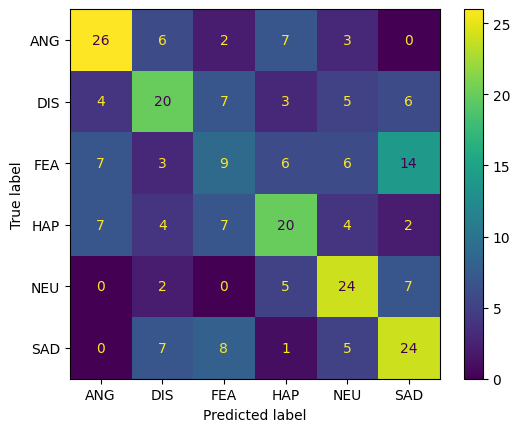

In [ ]:
test_model(model,x_val,y_val)

9/9 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         ANG       0.60      0.64      0.62        44
         DIS       0.51      0.47      0.49        45
         FEA       0.40      0.27      0.32        45
         HAP       0.50      0.41      0.45        44
         NEU       0.43      0.61      0.50        38
         SAD       0.47      0.56      0.51        45

    accuracy                           0.49       261
   macro avg       0.48      0.49      0.48       261
weighted avg       0.49      0.49      0.48       261



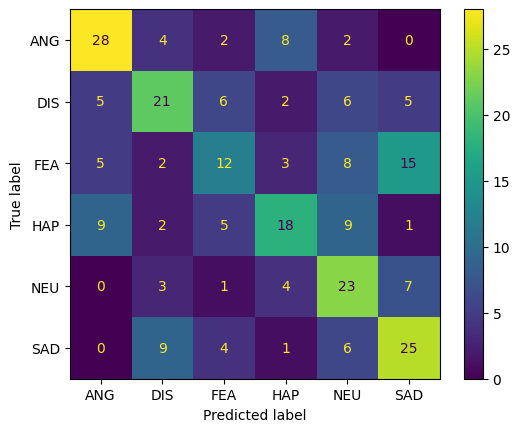

In [ ]:
test_model(modeltry_1D,x_val,y_val)

9/9 [==============================] - 0s 32ms/step
              precision    recall  f1-score   support

         ANG       0.61      0.70      0.65        44
         DIS       0.65      0.58      0.61        45
         FEA       0.60      0.13      0.22        45
         HAP       0.50      0.48      0.49        44
         NEU       0.32      0.63      0.43        38
         SAD       0.48      0.47      0.47        45

    accuracy                           0.49       261
   macro avg       0.53      0.50      0.48       261
weighted avg       0.53      0.49      0.48       261



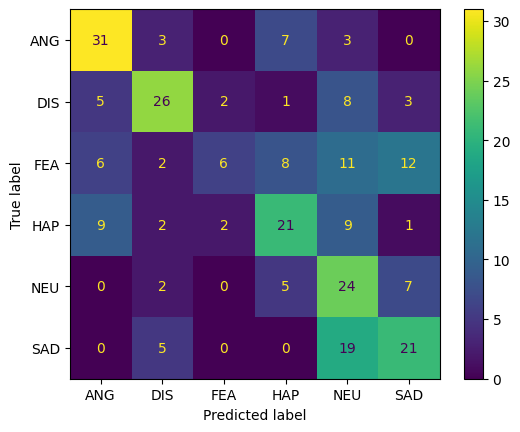

In [ ]:
test_model(modeltry2_1D, x_val, y_val)

9/9 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

         ANG       0.52      0.73      0.61        44
         DIS       0.60      0.47      0.52        45
         FEA       0.53      0.20      0.29        45
         HAP       0.39      0.27      0.32        44
         NEU       0.34      0.53      0.41        38
         SAD       0.48      0.62      0.54        45

    accuracy                           0.47       261
   macro avg       0.48      0.47      0.45       261
weighted avg       0.48      0.47      0.45       261



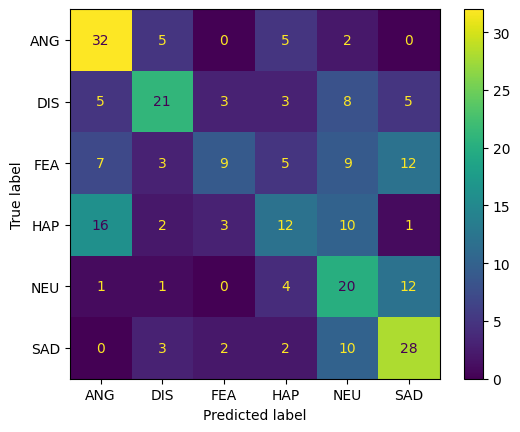

In [ ]:
test_model(model3_1D, x_val, y_val)

9/9 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         ANG       0.50      0.57      0.53        44
         DIS       0.48      0.58      0.53        45
         FEA       0.33      0.07      0.11        45
         HAP       0.46      0.39      0.42        44
         NEU       0.37      0.34      0.36        38
         SAD       0.39      0.67      0.50        45

    accuracy                           0.44       261
   macro avg       0.42      0.43      0.41       261
weighted avg       0.42      0.44      0.41       261



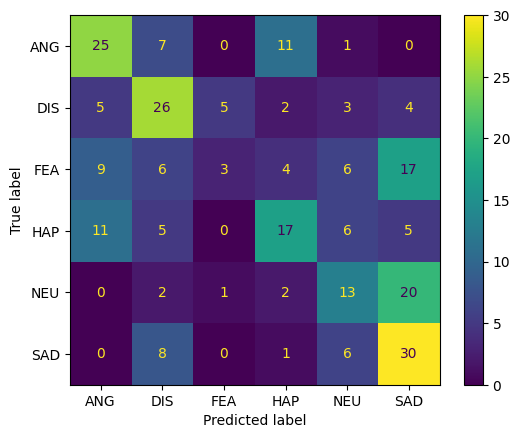

In [ ]:
test_model(modell, x_val, y_val)

70/70 [==============================] - 1s 8ms/step
              precision    recall  f1-score   support

         ANG       0.63      0.72      0.67       382
         DIS       0.47      0.41      0.44       381
         FEA       0.40      0.16      0.23       381
         HAP       0.41      0.44      0.43       382
         NEU       0.43      0.67      0.52       326
         SAD       0.57      0.59      0.58       381

    accuracy                           0.49      2233
   macro avg       0.48      0.50      0.48      2233
weighted avg       0.49      0.49      0.48      2233



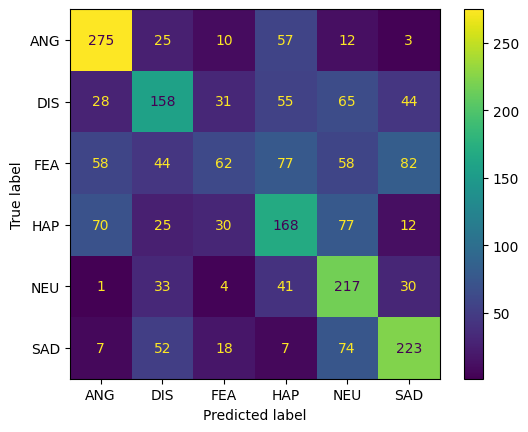

In [ ]:
test_model(modeltry2_1D, x_test, y_test)

9/9 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

         ANG       0.67      0.68      0.67        44
         DIS       0.35      0.40      0.38        45
         FEA       0.42      0.22      0.29        45
         HAP       0.49      0.43      0.46        44
         NEU       0.37      0.50      0.42        38
         SAD       0.48      0.53      0.51        45

    accuracy                           0.46       261
   macro avg       0.46      0.46      0.45       261
weighted avg       0.46      0.46      0.45       261



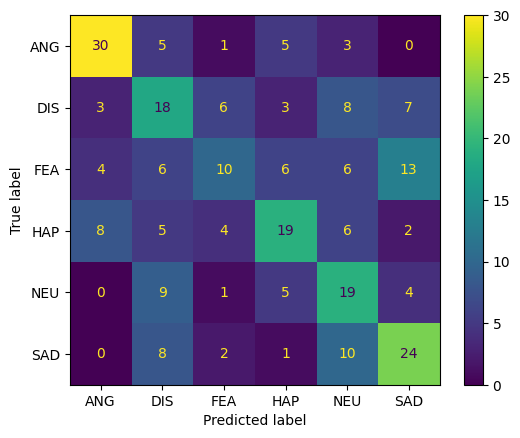

In [ ]:
test_model(model2_2D,x_val2,y_val2)

9/9 [==============================] - 1s 8ms/step
              precision    recall  f1-score   support

         ANG       0.62      0.59      0.60        44
         DIS       0.44      0.53      0.48        45
         FEA       0.54      0.42      0.48        45
         HAP       0.49      0.50      0.49        44
         NEU       0.49      0.50      0.49        38
         SAD       0.51      0.51      0.51        45

    accuracy                           0.51       261
   macro avg       0.51      0.51      0.51       261
weighted avg       0.51      0.51      0.51       261



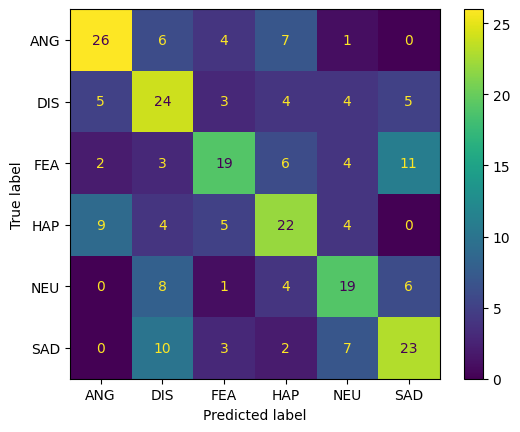

In [ ]:
test_model(model4_2D ,x_val2,y_val2)

9/9 [==============================] - 1s 21ms/step
              precision    recall  f1-score   support

         ANG       0.17      1.00      0.29        44
         DIS       0.00      0.00      0.00        45
         FEA       0.00      0.00      0.00        45
         HAP       0.00      0.00      0.00        44
         NEU       0.00      0.00      0.00        38
         SAD       0.00      0.00      0.00        45

    accuracy                           0.17       261
   macro avg       0.03      0.17      0.05       261
weighted avg       0.03      0.17      0.05       261



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


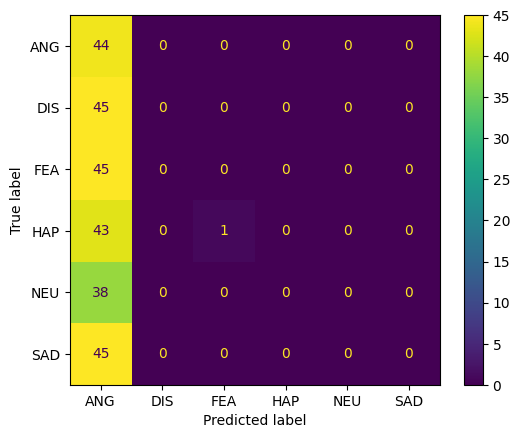

In [ ]:
test_model(model_2D,x_val2,y_val2)


70/70 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

         ANG       0.61      0.63      0.62       382
         DIS       0.40      0.36      0.38       381
         FEA       0.41      0.25      0.31       381
         HAP       0.44      0.47      0.46       382
         NEU       0.51      0.61      0.56       326
         SAD       0.51      0.64      0.57       381

    accuracy                           0.49      2233
   macro avg       0.48      0.49      0.48      2233
weighted avg       0.48      0.49      0.48      2233



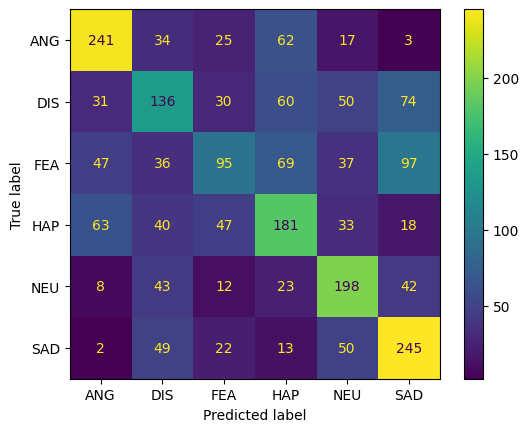

In [ ]:
test_model(model2_2D,x_test2,y_test2)